# <p style= 'background-color:crimson;font-size:150%;text-align:center;border-radius:5px;color:white'>Stock Market Analysis</p>


## Data

<p>In this Project, i will analyse data of some Brazillian stocks in different market segments. The data will be extracted using <b>pandas datareader</b>. <br>We will get information for the following stocks:<br></p>
<ul>
    <li><b>PETROBRAS(PETR4.SA):</b> Energy segment focusing on exploring, refining and generating petroleum an its derivatives.</li>
    <li><b>Vale S.A(VALE3.SA):</b> In raw material segment, Vale is one of the biggest mining company of the world.</li>
    <li><b>Magazine Luiza(MGLU3.SA):</b> Big company inside retail segment.</li>
    <li><b>AMBEV(ABEV3.SA):</b> In the consumption segment, it's the biggest ale manifacturer company of the world .</li>
</ul>


# <p style = 'background-color:purple;border-radius:5px; text-align:center'>Contents</p>
* [1. What's the change in stock's price over time?](#1)
* [2. How a moving average will behave on these charts?](#2)
    * [2.1. Plotting Moving Averages in all stocks for better analysis](#2.1)
* [3. Why volume is important?](#3)
* [4. What was the daily return average of a stock?](#4)
    * [4.1. Checking Correlations between stocks returns](#4.1)
* [5. How can we predit the price of a stock?](#5)
    * [5.1. Data Pre-processing](#5.1)
    * [5.2. Building The Model](#5.2)
    * [5.2. Final Results](#5.3)

In [1]:
#Data manipulation
import pandas as pd
import numpy as np
import time

#Visual Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# time series
from statsmodels.tsa.seasonal import seasonal_decompose
# ML libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from sklearn.preprocessing import MinMaxScaler # for scaling
from keras.models import Sequential
from keras.layers import Dense, LSTM


#financial analysis
import yfinance as yf
import pandas_datareader as web
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data from 2 years back
end = datetime(2022, 1, 1)
start = datetime(2020, 1, 1)
#df =yf.download(tickers,  start = "2021-02-01" , end = "2021-02-04")

In [3]:
#getting stock data
#petr = web.DataReader('PETR4.SA', 'yahoo', start = start, end = end)
#vale = web.DataReader('VALE3.SA', 'yahoo', start, end)
#mglu = web.DataReader('MGLU3.SA', 'yahoo', start, end)
#abev = web.DataReader('ABEV3.SA', 'yahoo', start, end)
start_timer = time.time()
petr = yf.download("PETR4.SA", start = start, end = end)
vale = yf.download("VALE3.SA", start = start, end = end)
mglu = yf.download("MGLU3.SA", start = start, end = end)
abev = yf.download("ABEV3.SA", start = start, end = end)
end_timer = time.time() - start_timer

print(f'Done! {round(end_timer, 2)} seconds to load.' )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Done! 5.19 seconds to load.


---
<a id = 1></a>
# <p style = 'background:crimson;border-radius:5px;text-align:center'>What's the change in stock's price over time?</p>


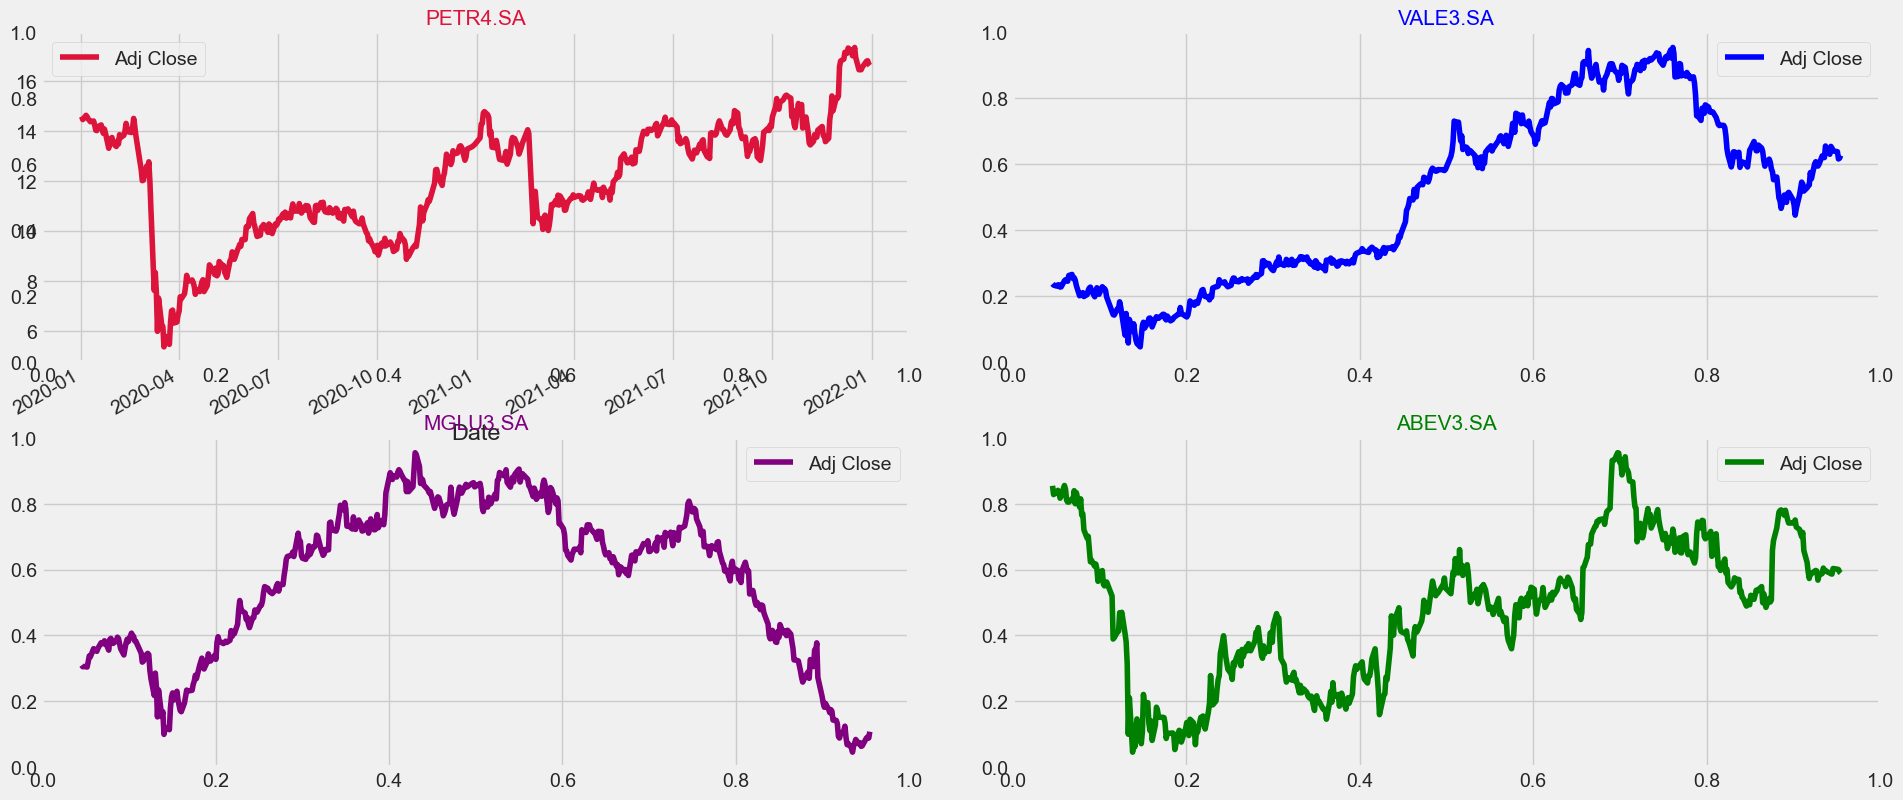

In [4]:
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize = (20,10))
fig.tight_layout(pad = 3.0)
fig.add_subplot(221)
petr['Adj Close'].plot(color = 'crimson', legend = True)
plt.title('PETR4.SA', fontsize = '15', color = 'crimson')
#plt.axis('off')

fig.add_subplot(222)
vale['Adj Close'].plot(color = 'blue',legend = True)
plt.title('VALE3.SA', fontsize = '15', color = 'blue')
plt.axis('off')

fig.add_subplot(223)
mglu['Adj Close'].plot(color = 'purple', legend = True)
plt.title('MGLU3.SA', fontsize = '15', color = 'purple')
plt.axis('off')

fig.add_subplot(224)
abev['Adj Close'].plot(color = 'green', legend = True)
plt.title('ABEV3.SA', fontsize = '15', color = 'green')
plt.axis('off')

plt.show()   

In [5]:
vale.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,495.0,7.642760e+01,2.344576e+01,3.555000e+01,5.645500e+01,7.302000e+01,9.729000e+01,1.198000e+02
High,495.0,7.743830e+01,2.359869e+01,3.586000e+01,5.696500e+01,7.468000e+01,9.870500e+01,1.204500e+02
Low,495.0,7.531170e+01,2.324986e+01,3.245000e+01,5.576500e+01,7.115000e+01,9.595000e+01,1.152500e+02
Close,495.0,7.636729e+01,2.343472e+01,3.410000e+01,5.633500e+01,7.370000e+01,9.745500e+01,1.187200e+02
Adj Close,495.0,6.126298e+01,2.057947e+01,2.538711e+01,4.194083e+01,6.358464e+01,7.851696e+01,9.695543e+01
Volume,495.0,2.879879e+07,1.364656e+07,7.831800e+06,2.054455e+07,2.594750e+07,3.290755e+07,1.825358e+08


<a id = 2></a>
# <p style = 'background:crimson;border-radius:5px;text-align:center'>How a moving average will behave on these charts?</p>
- Let's find out by plotting a slow(100 periods), medium(50 periods) and a quick(9 periods) moving average to see the difference.

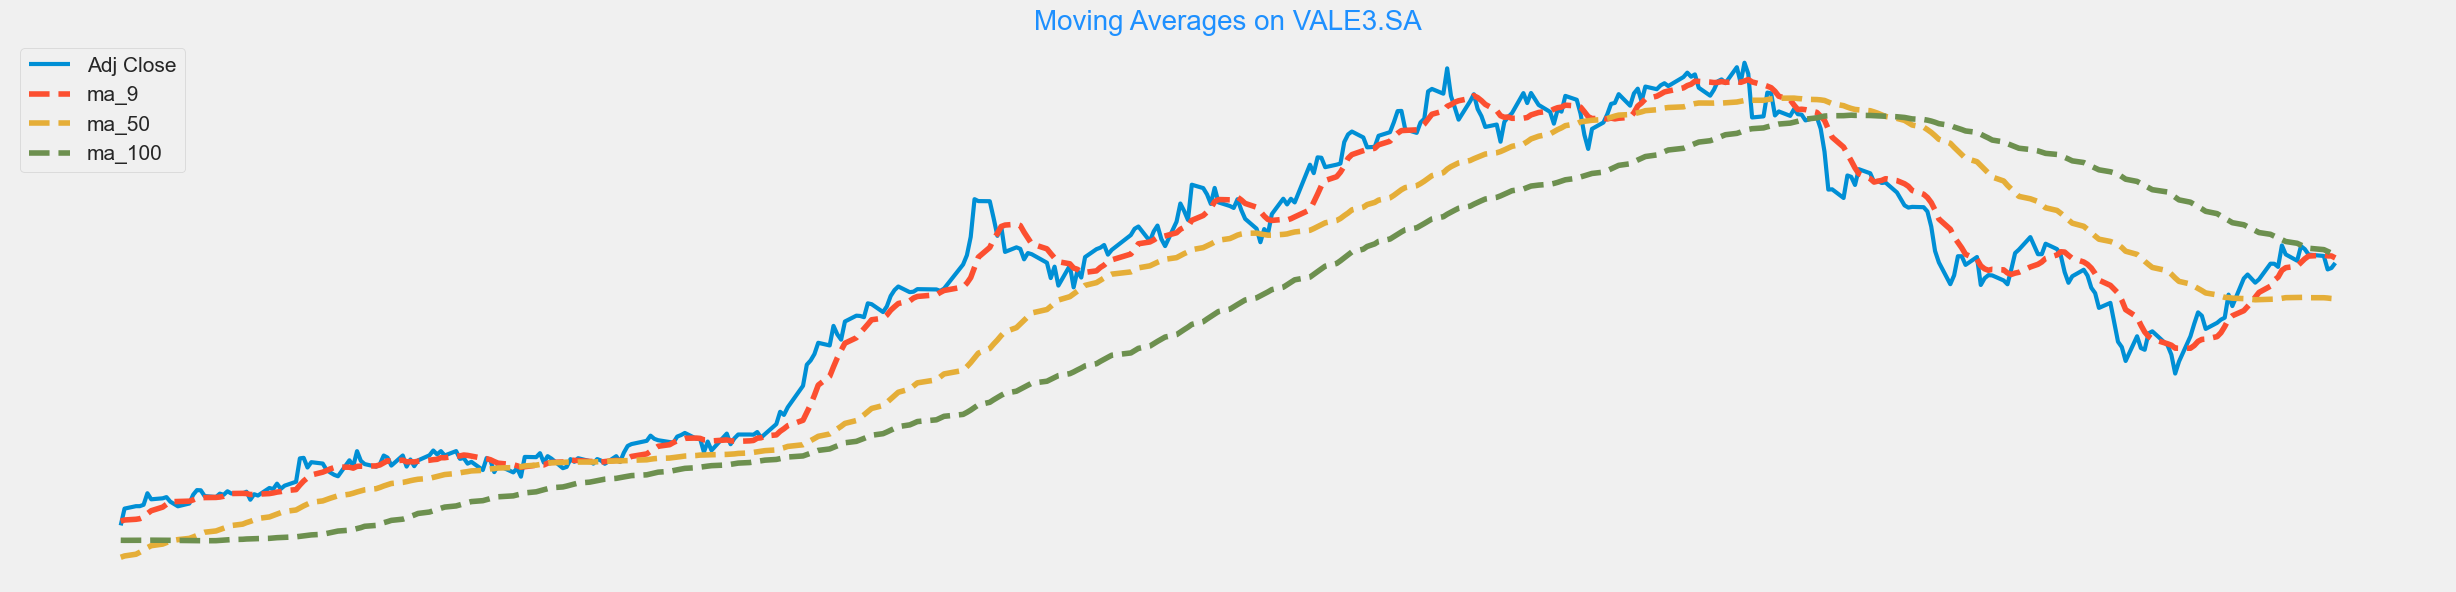

In [6]:
#creating moving averages
stock_list = [petr, vale, mglu, abev]
for stock in stock_list:
    stock['ma_9'] = stock['Adj Close'].rolling(window = 9, center = False).mean()
    stock['ma_50'] = stock['Adj Close'].rolling(window = 50, center = False).mean()
    stock['ma_100'] = stock['Adj Close'].rolling(window = 100, center = False).mean()


#plottting
#slicing the data to fit the average better
#price
vale.iloc[100:]['Adj Close'].plot(figsize = (28, 8), linewidth = 3)

#averages
vale.iloc[100:]['ma_9'].plot(figsize = (28, 8), linestyle = 'dashed')
vale.iloc[100:]['ma_50'].plot(figsize = (28, 8), linestyle = 'dashed')
vale.iloc[100:]['ma_100'].plot(figsize = (28, 8), linestyle = 'dashed')
plt.title('Moving Averages on VALE3.SA', fontsize = 20, color = 'dodgerblue')
plt.legend(loc = 'upper left', fontsize = 15)
plt.axis('off')
plt.show()


---
<a id = 2.1></a>
## Plotting Moving Averages in all stocks for better analysis 

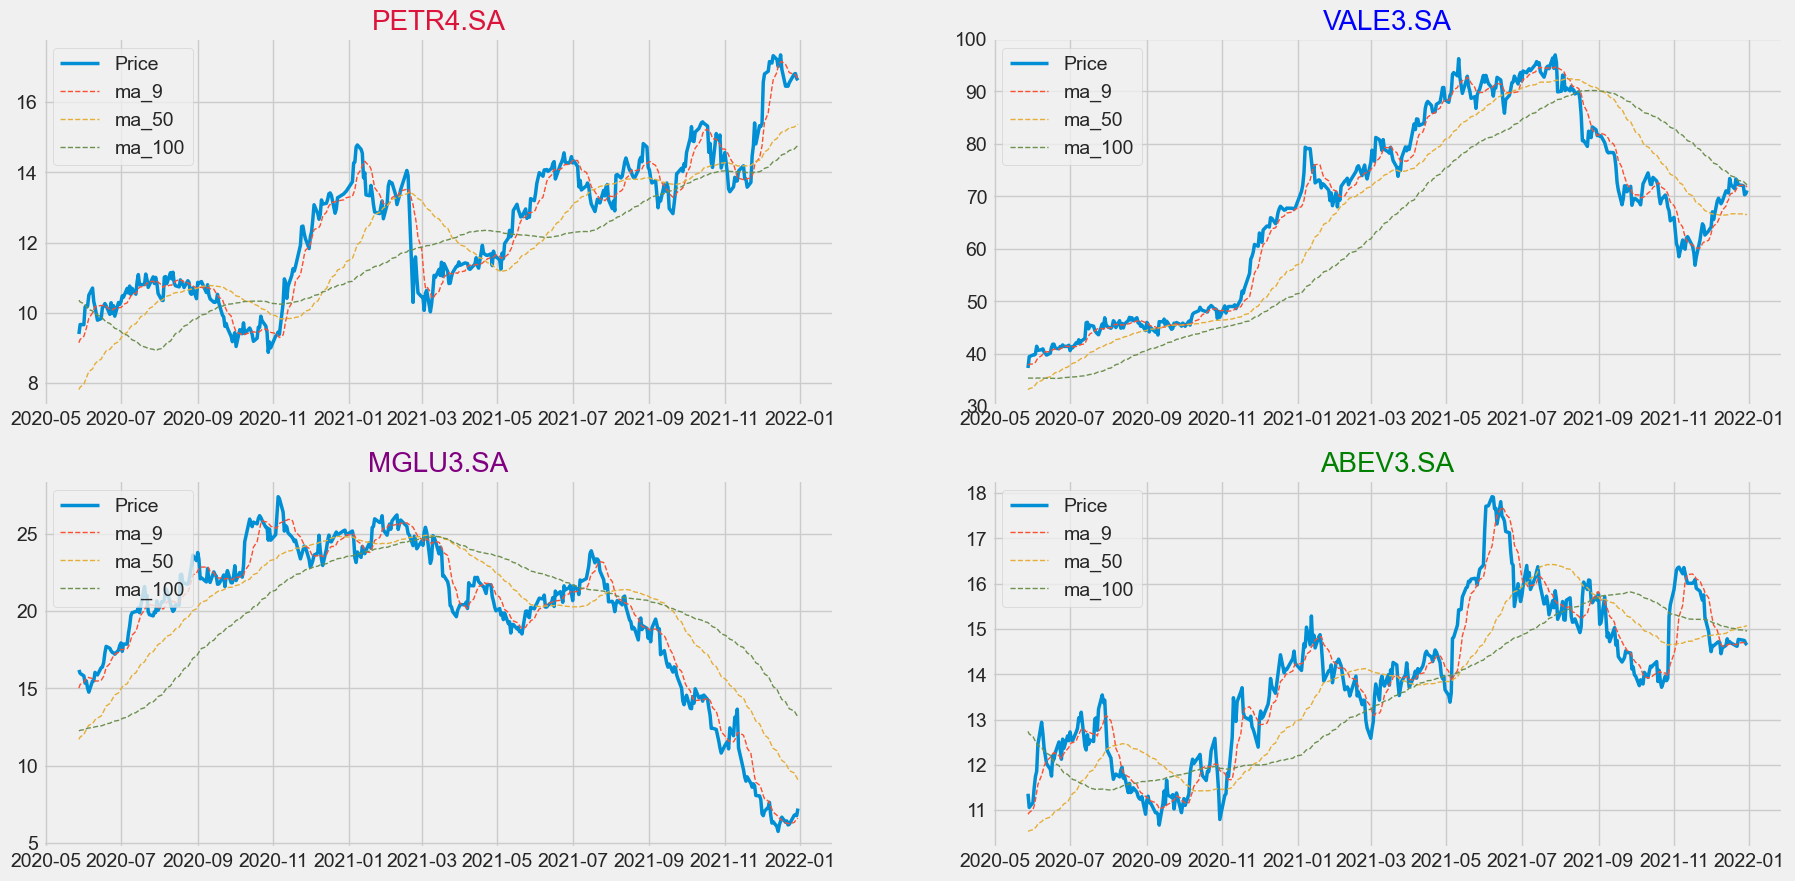

In [7]:
#adding moving averages to all stocks
stock_list = [petr, vale, mglu, abev]
for stock in stock_list:
    stock['ma_9'] = stock['Adj Close'].rolling(window = 9, center = False).mean()
    stock['ma_50'] = stock['Adj Close'].rolling(window = 50, center = False).mean()
    stock['ma_100'] = stock['Adj Close'].rolling(window = 100, center = False).mean()
mglu.head()


rows = 2
cols = 2
fig = plt.figure(figsize = (20, 10))
fig.tight_layout(pad = - 1.0)

#plotting all stocks
stock_names = [('PETR4.SA', 'crimson'), ('VALE3.SA', 'blue'), ('MGLU3.SA', 'purple'), ('ABEV3.SA', 'green')]
for i in range(1, 5):
    ax = fig.add_subplot(2,2,i)
    #ax.plot(stock_list[i - 1].iloc[100:][['Adj Close', 'ma_9', 'ma_50', 'ma_100']])
    ax.plot(stock_list[i-1].iloc[100:]['Adj Close'], linewidth = 2.5, label = 'Price')
    ax.legend(loc="upper left")
    plt.title(stock_names[i - 1][0], color = stock_names[i - 1][1], fontsize = 20)
    
    #moving averages
    ax.plot(stock_list[i-1].iloc[100:][['ma_9']], label = 'ma_9', linestyle = 'dashed', lw = '1')
    ax.legend(loc = 'upper left')
    
    ax.plot(stock_list[i-1].iloc[100:][['ma_50']], label = 'ma_50', linestyle = 'dashed', lw = '1')
    ax.legend(loc = 'upper left')
    
    ax.plot(stock_list[i-1].iloc[100:][['ma_100']], label = 'ma_100', linestyle = 'dashed', lw = '1')
    ax.legend(loc = 'upper left')
    

Plotting different moving averages allow us to take better reading of the price

<ul style = 'border: 1px dashed gray; border-radius: 5px'>
    <li>The quick moving average(ma_9) tracks a faster trend and moves closer to the price. A quicker trend is more likely to be volatile, with quick periods of up and down trends.
    </li>
    <li>The moving average of 50 periods changes directions slower being more steady. It is used to track longer trends.     </li>
    <li>The slow moving average(ma_100) is used to check the overall trend. Staying further from the price and having low volatility, we can say if the price is under this average we get a strong bearish trend and a strong bullish if it is above.
    </li>
</ul>

<a id = 3></a>
# <p style = 'background:crimson;border-radius:5px;text-align:center'>Why volume is important?</p>

<ul style = 'border:1px dashed gray; border-radius:5px'>
    <li>Volume measures the number of shares traded in a stock or contracts traded in futures or options.</li>
    <li>Can indicate market strength, as rising markets on increasing volume are typically viewed as strong and healthy.     </li>
    <li>When prices fall on increasing volume, the trend is gathering strength to the downside.</li>
    <li>When prices reach new highs(or lows) with decreasing volume, watch out, a reversal might happen soon</li>
</ul>

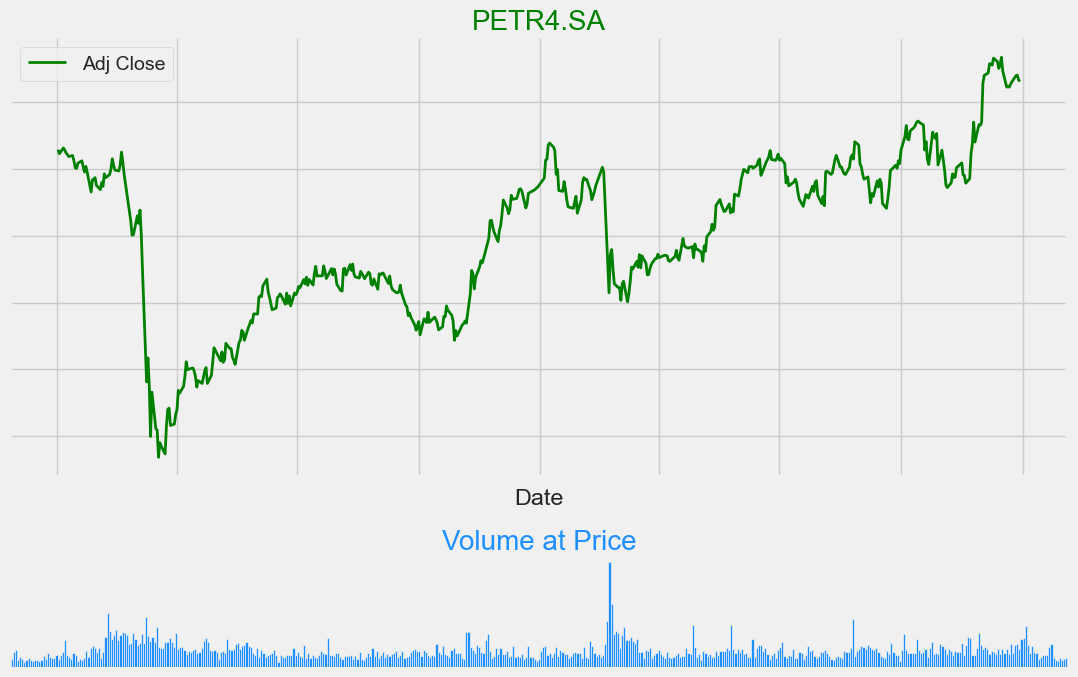

In [8]:
# plot it
fig = plt.figure(figsize=(11,7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1]) 

#stock price
ax0 = plt.subplot(gs[0])
ax0.set_yticklabels([])
ax0.set_xticklabels([])
petr['Adj Close'].plot(legend = True, linewidth=2, color = 'green')
plt.title('PETR4.SA', fontsize = 20, color = 'green')

#volume
ax1 = plt.subplot(gs[1])
plt.axis('off')
petr['Volume'].plot.bar(x = vale.index.day, rot = 0, color = 'dodgerblue', stacked = False, width=1)
plt.title('Volume at Price', fontsize = 20, color= 'dodgerblue')
plt.tight_layout()

---
<a id = 4></a>
# <p style = 'background:crimson; border-radius:5px;text-align:center'>What was the daily return average of a stock.</p>

The daily return column can be created by using the percentage change over the adjusted closing price

In [9]:
vale['Daily Return'] = vale['Adj Close'].pct_change()

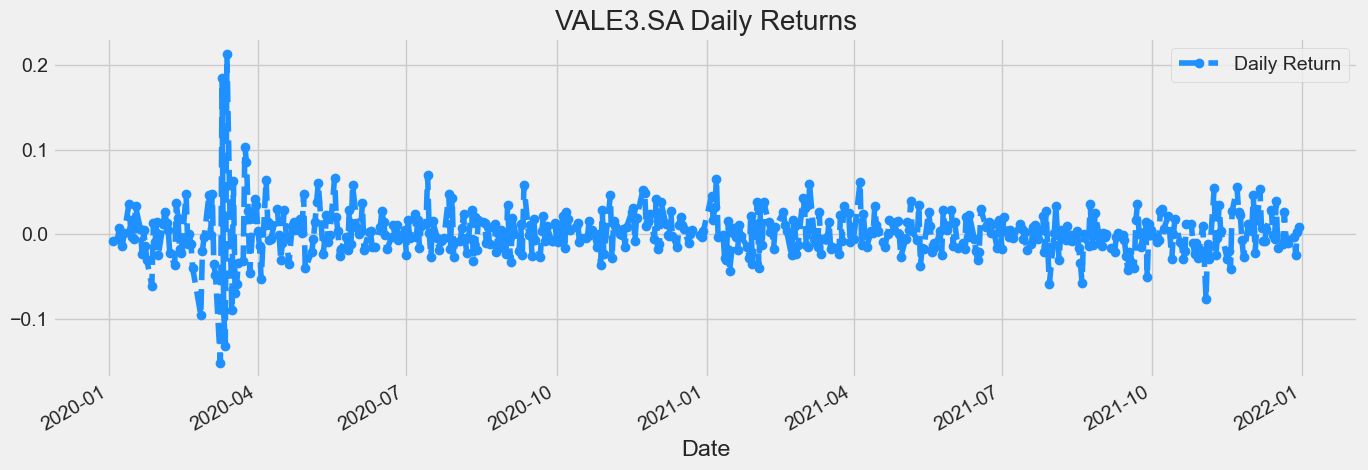

In [10]:
vale['Daily Return'].plot(figsize =(15, 5), legend=True, linestyle = '--', marker = 'o', color = 'dodgerblue')
plt.title('VALE3.SA Daily Returns', fontsize = 20)
plt.show()

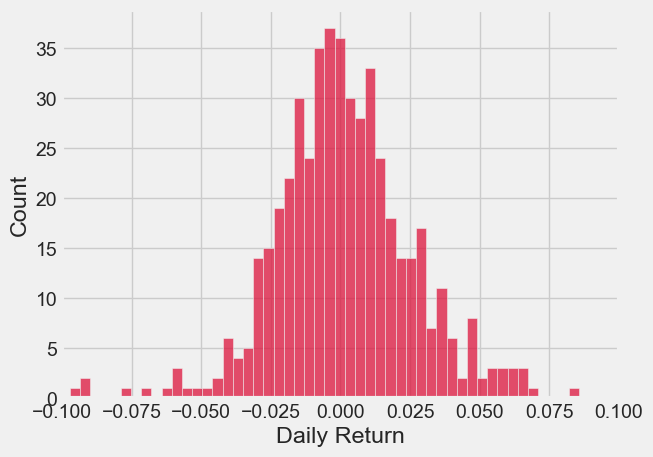

In [11]:
sns.histplot(x=vale['Daily Return'].dropna(),bins=100,color='crimson')
plt.xlim(-0.10, 0.10)
plt.show()

<span style = 'font-size:110%'>Positive daily returns seem to be more frequent for Vale.</span>

---
<a id = 4.1></a>
## <p>Checking Correlations between stock returns.</p>

In [12]:
#Reading just the 'Adj Close' column from stocks this time
stock_list = ['PETR4.SA', 'VALE3.SA', 'MGLU3.SA', 'ABEV3.SA']
#close_df = web.DataReader(stock_list,'yahoo',start,end)['Adj Close']
close_df = yf.download(stock_list, start = start, end = end)["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [13]:
close_df.tail()

,ABEV3.SA,MGLU3.SA,PETR4.SA,VALE3.SA
Date,,,,
2021-12-23 00:00:00-03:00,14.771684,6.20,16.556160,72.218056
2021-12-27 00:00:00-03:00,14.752684,6.78,16.801609,72.035568
2021-12-28 00:00:00-03:00,14.743185,6.83,16.819141,70.301979
2021-12-29 00:00:00-03:00,14.676688,6.76,16.678883,70.484459
2021-12-30 00:00:00-03:00,14.648190,7.22,16.626287,71.132271


In [14]:
returns_df = close_df.pct_change()
returns_df.tail()

,ABEV3.SA,MGLU3.SA,PETR4.SA,VALE3.SA
Date,,,,
2021-12-23 00:00:00-03:00,0.010396,0.006494,0.006037,-0.009635
2021-12-27 00:00:00-03:00,-0.001286,0.093548,0.014825,-0.002527
2021-12-28 00:00:00-03:00,-0.000644,0.007375,0.001043,-0.024066
2021-12-29 00:00:00-03:00,-0.004510,-0.010249,-0.008339,0.002596
2021-12-30 00:00:00-03:00,-0.001942,0.068047,-0.003153,0.009191


---
### Let's create a scatterpltlot to visualize any correlations between the stocks we're analyzing.
- First we'll visualize a __jointplot__ for the relationshop between the daily return of a stock to itself.

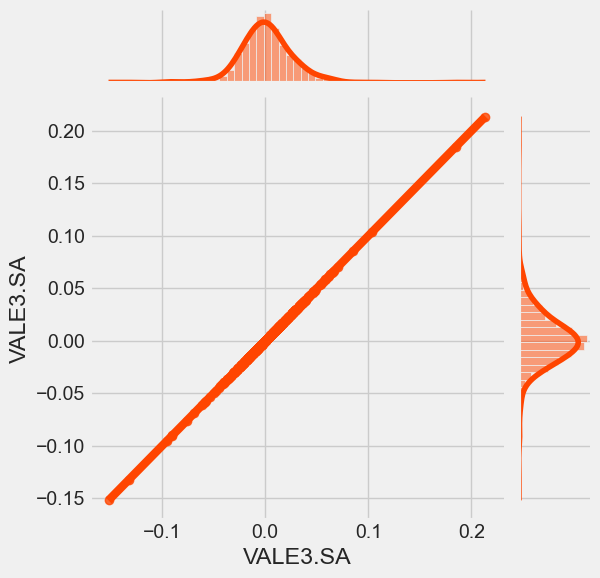

In [15]:
sns.jointplot(data=returns_df, x="VALE3.SA", y="VALE3.SA", kind = 'reg', color = 'orangered')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between VALE3.SA and PETR4.SA daily returns.

### How jointplot works
- A joint plot provides a concise way to understand both the relationship between two variables aswell as individual distrubution o each variable.
- The middle figure stands for the relationship plot. It shows how y and x are related.
- The histogram above shows how the **X** distrubution looks like.
- The histogram on the right shows how the **Y** distrubution looks like.
- The upper and right plots together gives us a sense of what the marginal distribution look like from both x and y. 
---

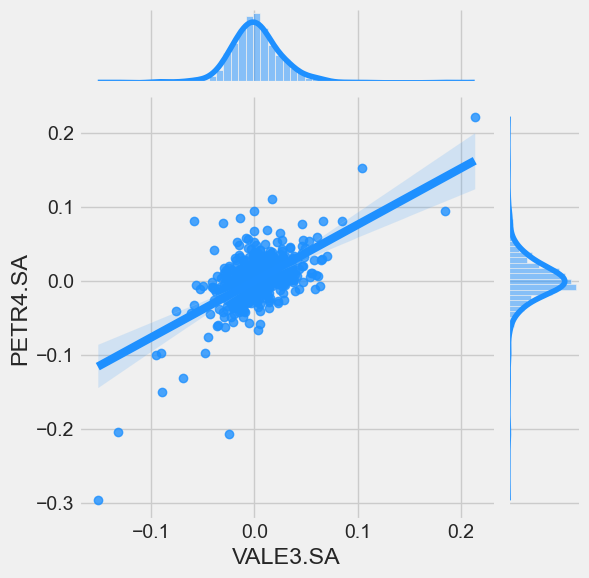

In [16]:
#sns.jointplot('VALE3.SA', 'PETR4.SA', returns_df, kind = 'reg', color = 'dodgerblue')
sns.jointplot(data=returns_df, x="VALE3.SA", y="PETR4.SA", kind = 'reg', color = 'dodgerblue')

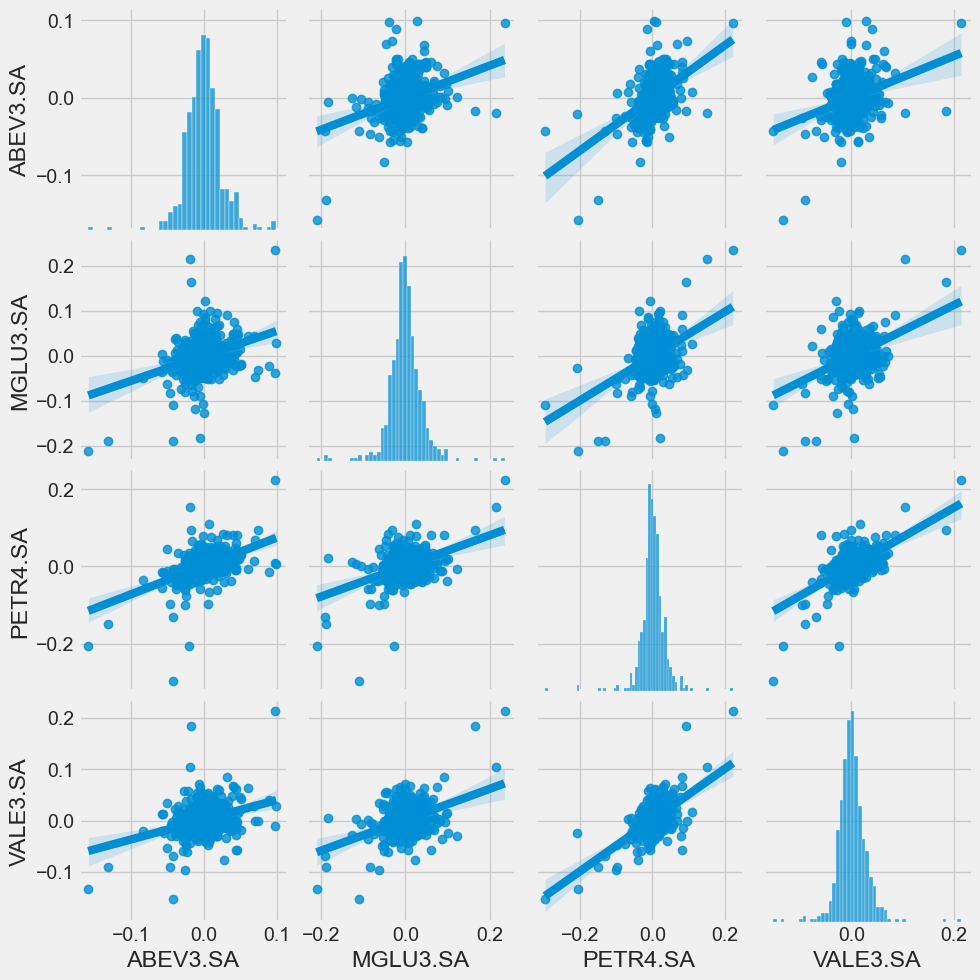

In [17]:
sns.pairplot(returns_df.dropna(), kind = 'reg')

### How pairplot works
- Pairplot helps to detect correlations between all the columns of the dataset.
- It works like a grid, plotting the X-axis against Y-axis creating multiple plots.
- Since the dataset we're plotting has 4 measurements, it creates a 4 x 4 grid plot.

<a id  = 5></a>
# <div style = 'background:crimson;border-radius:5px;text-align:center'>How can we predit the price of a stock?</div>

<ul style = 'border:1px dashed gray; border-radius:5px'>
    <li>There are many models out there to make predictions. This time i'll use <strong>Long Short Term Memory(LSTM)</strong>.</li>
    <li>LTSM is a type of recurrent neural network, capable of learning order dependence in sequence prediction problems.</li>
    <li>This is a behavior required in complex problem domains like machine translation, speech recognition, and more.</li>
    <li>When prices reach new highs(or lows) with decreasing volume, watch out, a reversal might happen soon</li>
</ul>

In [18]:
# Using Petrobras stock as an example
#df = web.DataReader('PETR4.SA', data_source = 'yahoo', start = '2012-01-01', end = datetime.now())
df = yf.download("PETR4.SA", start = '2012-01-01', end = datetime.now())

[*********************100%***********************]  1 of 1 completed


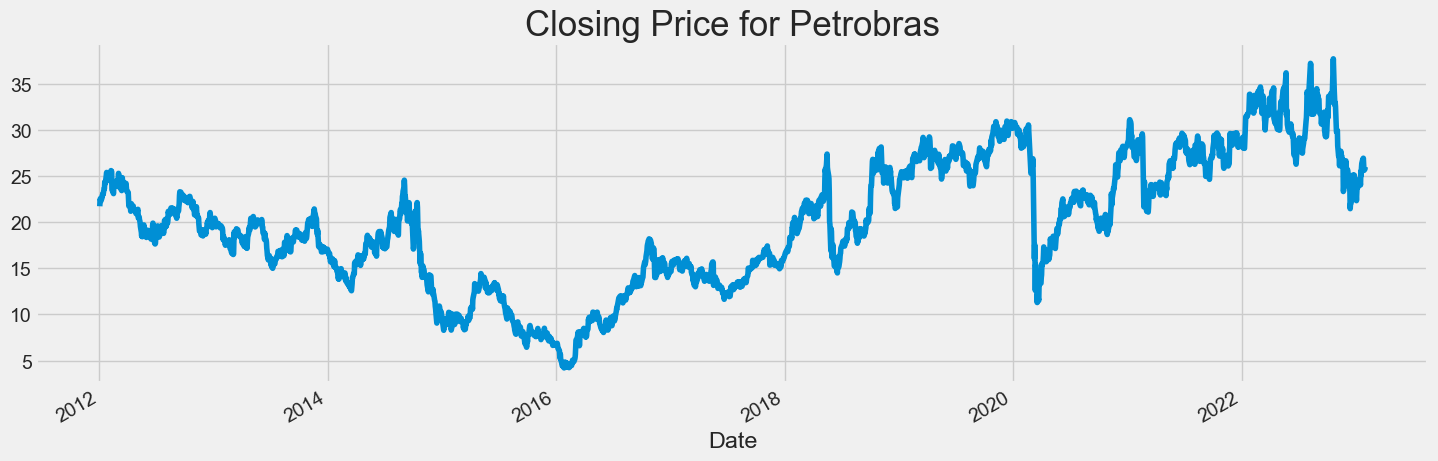

In [19]:
df['Close'].plot(figsize = (16, 5))
plt.title('Closing Price for Petrobras', fontsize = 25)
plt.show()

<a id = 5.1 ></a>
## <p style = 'text-align:center'>Data Pre-processing</p>
- First we need to scale the values for faster and better training.
- The data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower. 

In [20]:
# storing only the close price
close = df.filter(['Close'])

# converting the dataframe into numpy arrays
close_values = close.values

# using 95% of the stock data to train the model
training_data_len = int(np.ceil(len(close_values) * .95))

training_data_len

2614

In [21]:
# Scaling the data first
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(close_values)

scaled_data

array([[0.52297133],
       [0.54325773],
       [0.548031  ],
       ...,
       [0.63902148],
       [0.64289974],
       [0.65005964]])

<a id = 5.2></a>
## <p style = 'text-align:center'>Building The Model</p>

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.52297133, 0.54325773, 0.548031  , 0.54027443, 0.5408711 ,
       0.54982096, 0.55787587, 0.5581742 , 0.5632458 , 0.56235079,
       0.58025057, 0.58025057, 0.60173032, 0.59695699, 0.59725533,
       0.6244033 , 0.6324582 , 0.61813841, 0.61068017, 0.60769687,
       0.60769687, 0.61903342, 0.60650358, 0.60889021, 0.61634845,
       0.63842481, 0.63335321, 0.63544151, 0.57577564, 0.57577564,
       0.56712406, 0.56384248, 0.58711213, 0.59218373, 0.58830547,
       0.6050119 , 0.60113364, 0.60053697, 0.5999403 , 0.61694506,
       0.6294749 , 0.60829354, 0.58323387, 0.59009543, 0.59337707,
       0.58204053, 0.57368734, 0.60352028, 0.61545344, 0.59725533,
       0.60113364, 0.60113364, 0.59874701, 0.59397375, 0.59397375,
       0.58174225, 0.59695699, 0.5847255 , 0.572494  , 0.5704057 ])]
[0.5713007090050437]

[array([0.52297133, 0.54325773, 0.548031  , 0.54027443, 0.5408711 ,
       0.54982096, 0.55787587, 0.5581742 , 0.5632458 , 0.56235079,
       0.58025057, 0.58025057, 0.601

In [23]:
# Building the LSTM network
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#training the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2554/2554 [==============================] - 50s 18ms/step - loss: 0.0014


In [24]:
# Creating the testing dataset
test_data = scaled_data[training_data_len - 60 :, : ]
x_test = []
y_test = close_values[training_data_len: , : ]

for i in range(60, len(test_data)):
    x_test.append(test_data[i -60: i, 0])
    
# converting the data into a numpy array
x_test = np.array(x_test)

# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# gettin the rootmean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 16ms/step


1.989080380219426

<a id = 5.3></a>
## <p style = 'text-align:center'>Final Results</p>

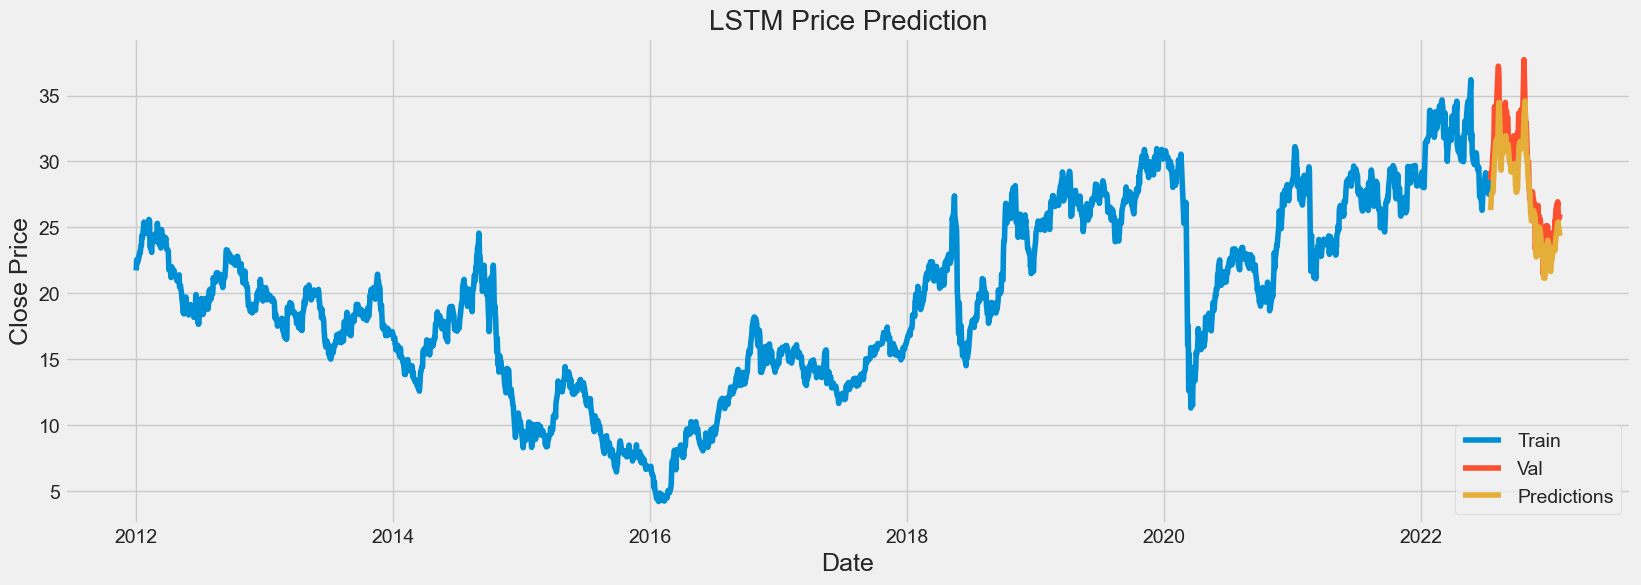

In [25]:
# Plotting the data
train = close[:training_data_len]
valid = close[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (18, 6))
plt.title('LSTM Price Prediction')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [26]:
# Showing the valid predicted prices
valid

,Close,Predictions
Date,,
2022-07-18 00:00:00-03:00,28.600000,26.302416
2022-07-19 00:00:00-03:00,29.180000,26.677107
2022-07-20 00:00:00-03:00,29.170000,27.246565
2022-07-21 00:00:00-03:00,29.020000,27.567297
2022-07-22 00:00:00-03:00,29.330000,27.582222
...,...,...
2023-01-25 00:00:00-03:00,26.940001,25.287483
2023-01-26 00:00:00-03:00,26.250000,25.399565
2023-01-27 00:00:00-03:00,25.620001,25.119347
